In [4]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base, qtm.constant, qtm.nqubit, qtm.fubini_study, qtm.progress_bar

In [11]:
num_qubits = 3
num_layers = 1
thetas = np.ones((num_qubits*num_layers*5))
theta = np.pi / 2

In [12]:
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
loss_values = []
thetass = []
bar = qtm.progress_bar.ProgressBar(max_value=100, disable=False)
for i in range(0, 100):
    bar.update(1)
    G = qtm.fubini_study.calculate_koczor_state(qc.copy(), thetas, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_GHZchecker_koczor, 
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss))   
    qc_copy = qtm.nqubit.create_GHZchecker_koczor(qc.copy(), thetas, num_layers, theta)
    loss = qtm.base.loss_fubini_study(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)
    thetass.append(thetas)
bar.close()



Step: 100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


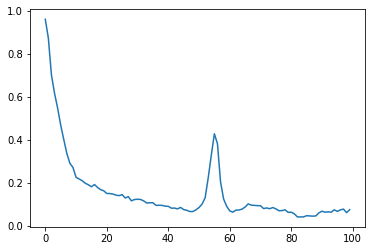

In [13]:
plt.plot(loss_values)